# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm
%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.rename(columns = {"listed_in":"genres"},inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [ ]:
# drope duplicates if any
df=df.drop_duplicates()
df.shape

(7787, 12)

NO DUPLIACTES FOUND

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 790.9+ KB


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
genres           492
description     7769
dtype: int64

we can see that for each of the columns, there are alot different uniquevalues for some of them . it makes sense that show _id large since it is unique key used to identify a movie or show

## Handling null values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

In [ ]:
#total null values
df.isnull().sum().sum()

3631

There are total 3631 null values in the dataset where 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values.

In [ ]:
# Handling Null Values
df['director'].fillna('no director',inplace=True)
df['cast'].fillna('no cast',inplace=True)
df['country'].fillna('country unavailable',inplace=True)

In [ ]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

In [ ]:
'''nf['rating'] = nf['rating'].replace({   'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'})'''


"nf['rating'] = nf['rating'].replace({   'TV-PG': 'Older Kids',\n    'TV-MA': 'Adults',\n    'TV-Y7-FV': 'Older Kids',\n    'TV-Y7': 'Older Kids',\n    'TV-14': 'Teens',\n    'R': 'Adults',\n    'TV-Y': 'Kids',\n    'NR': 'Adults',\n    'PG-13': 'Teens',\n    'TV-G': 'Kids',\n    'PG': 'Older Kids',\n    'G': 'Kids',\n    'UR': 'Adults',\n    'NC-17': 'Adults'})"

#      EDA

## 1. Type

In [ ]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [ ]:
# Create a pie chart for Type.
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = df.type.value_counts()[1]
movie = df.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

**Netflix has 5372 movies and 2398 TV shows, there are more number movies on Netflix than TV shows.**

## 2. Ratings

In [ ]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [ ]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [ ]:
# type should be a category
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,target_ages
0,s1,TV Show,3%,no director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens


In [ ]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

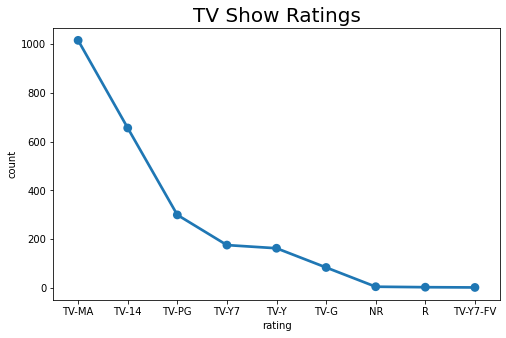

In [ ]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

**TV-MA has the highest number of ratings for tv shows i,e adult ratings.**

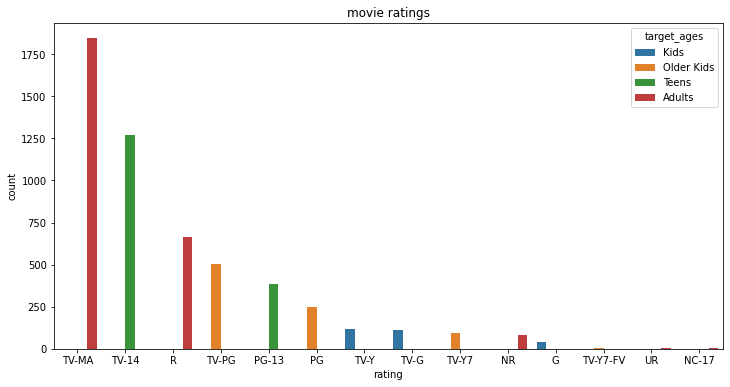

In [ ]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(12,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)


**TV-MA has the highest number of ratings for tv shows i,e adult ratings in both the cases TV-MA has the highest number of ratings.**

## 3. Production Growth based on type of the content & release_year

In [ ]:
yearly_movies=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False)
yearly_shows=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False)
total_content=df['release_year'].value_counts().sort_index(ascending=False)

For Movies

In [ ]:
yearly_movies.head()

2021     12
2020    411
2019    582
2018    734
2017    742
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Production Growth Yearly')

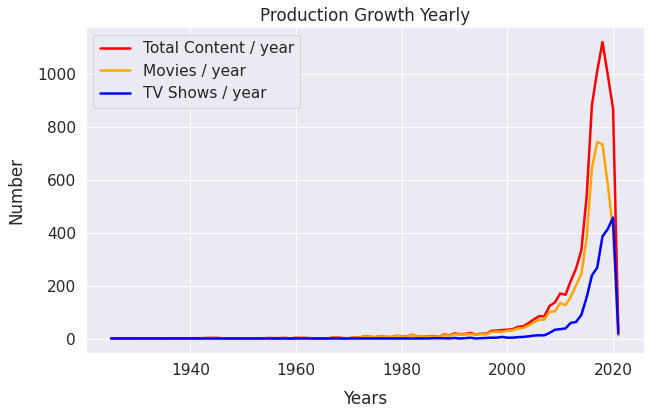

In [ ]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(10, 6), linewidth=2.5, color='red',label="Total Content / year")
yearly_movies.plot(figsize=(10, 6), linewidth=2.5, color='orange',label="Movies / year")
yearly_shows.plot(figsize=(10, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=12)
plt.ylabel("Number", labelpad=12)
plt.legend()
plt.title("Production Growth Yearly")

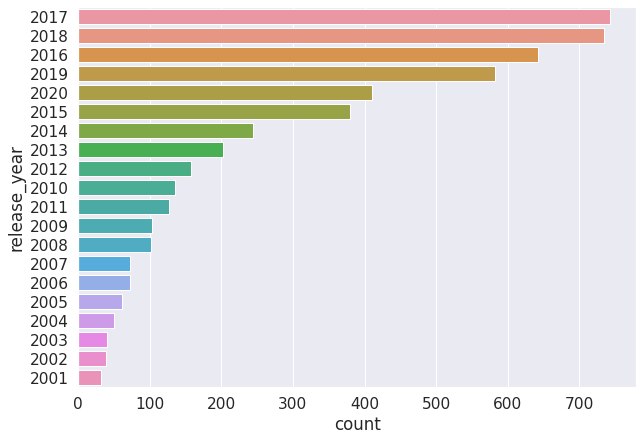

In [ ]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(10,7))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])

**Highest number of movies released in 2017 and 2018.**

For TV_Shows

In [ ]:
yearly_shows.head()

2021     19
2020    457
2019    414
2018    386
2017    268
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Production Growth Yearly')

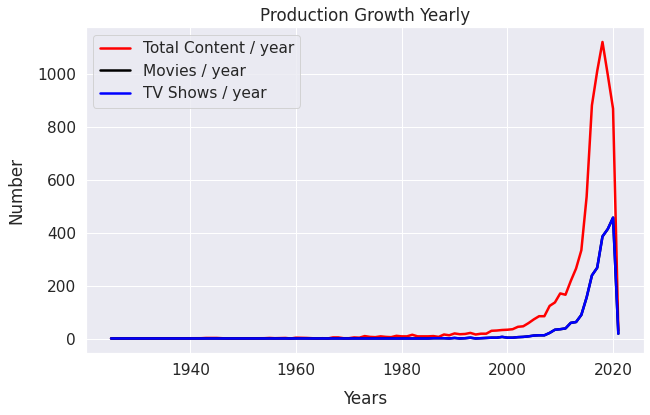

In [ ]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(10, 6), linewidth=2.5, color='red',label="Total Content / year")
yearly_shows.plot(figsize=(10, 6), linewidth=2.5, color='black',label="Movies / year")
yearly_shows.plot(figsize=(10, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=12)
plt.ylabel("Number", labelpad=12)
plt.legend()
plt.title("Production Growth Yearly")

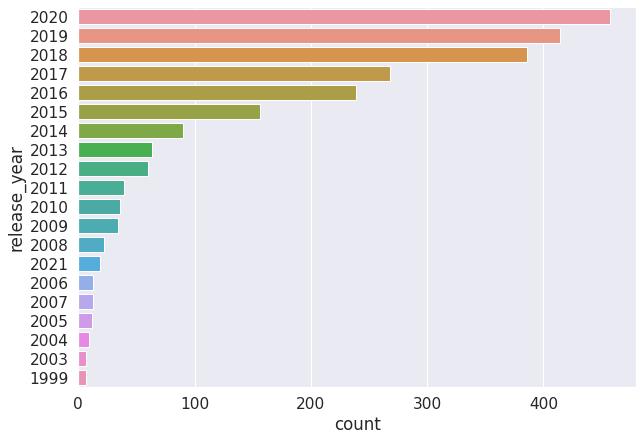

In [ ]:
#Analysing how many TV Shows released per year in last 20 years
plt.figure(figsize=(10,7))
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])

*   highest number of movies released in 2017 and 2018
*   highest number of TV Shows released in 2020
*   The number of movies on Netflix is growing significantly faster than the number of TV shows.
*   We saw a huge increase in the number of movies and television episodes after 2015.
*   there is a significant drop in the number of movies and television episodes produced after 2020.
*   It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows.

In [ ]:
# Put the data into bins.
release_yr_bin = pd.cut(df.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

,year_interval,count
0,"(2010, 2021]",7462
1,"(1999, 2010]",308
2,"(1924, 1999]",0


In [ ]:
# Plot contain according to release year
fig = px.pie(release_yr_bin, values='count', names='year_interval', color_discrete_sequence=px.colors.sequential.Aggrnyl, title='When was most content released.',height=500, width=500)
fig.show()

*   96% of the content available was released between 2010 and 2021.
*   3.96% of the content available was released before 2010.



## 4. Genre

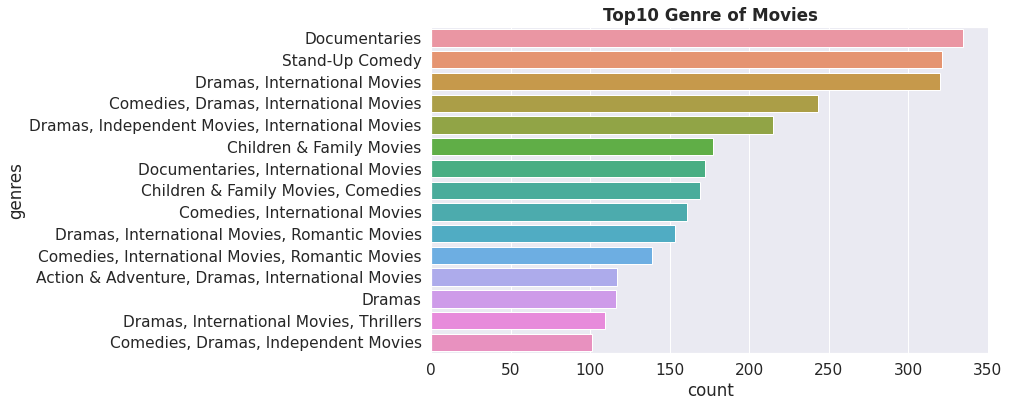

In [ ]:
# Analysing top 15 genre of the movies
plt.figure(figsize=(10,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['genres'],data=movies,order=movies['genres'].value_counts().index[0:15])


**Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies.**

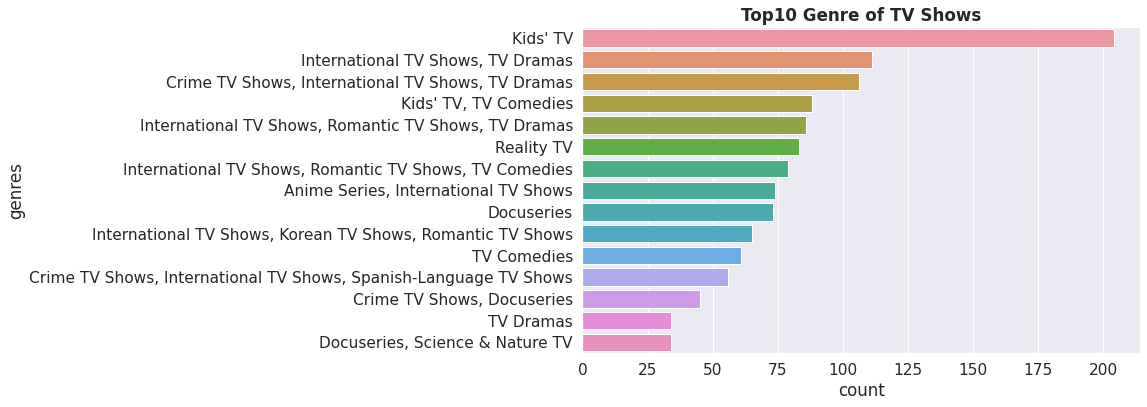

In [ ]:
# Analysing top 15 genres of TV SHOWS
plt.figure(figsize=(10,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['genres'],data=tv_shows,order=tv_shows['genres'].value_counts().index[0:15])

**kids tv is the top most TV show genre in netflix.**

## 5. Duration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


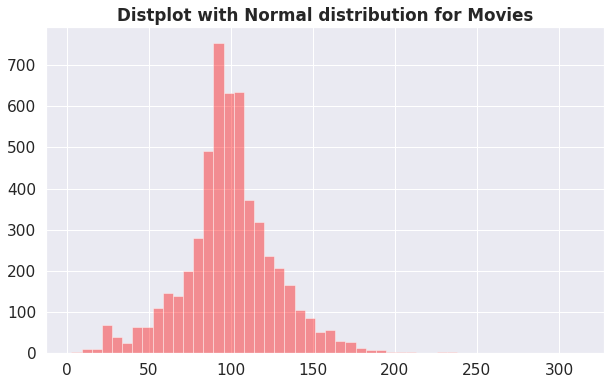

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,6))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

**Most of the movies have duration of between 50 to 150.**

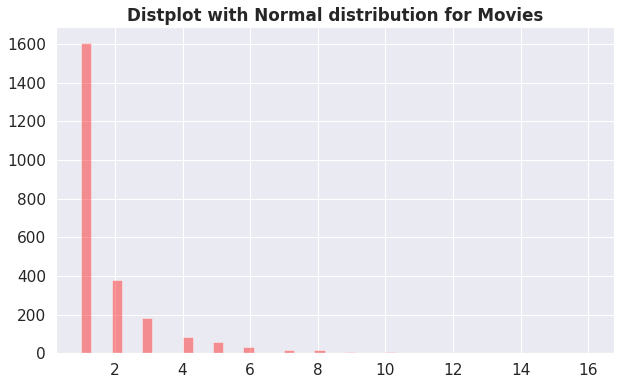

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,6))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(tv_shows['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

**Highest number of tv_shows consistig of single season.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


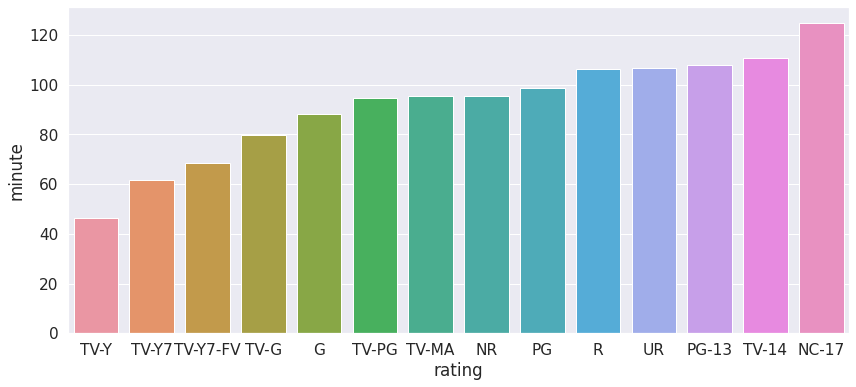

In [ ]:
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(14,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

**Those movies that have a rating of NC-17 means Adults, they have the longest average duration.**

**When it comes to movies having a TV-Y means Kids , they have the shortest runtime on average.**

## 6. Country

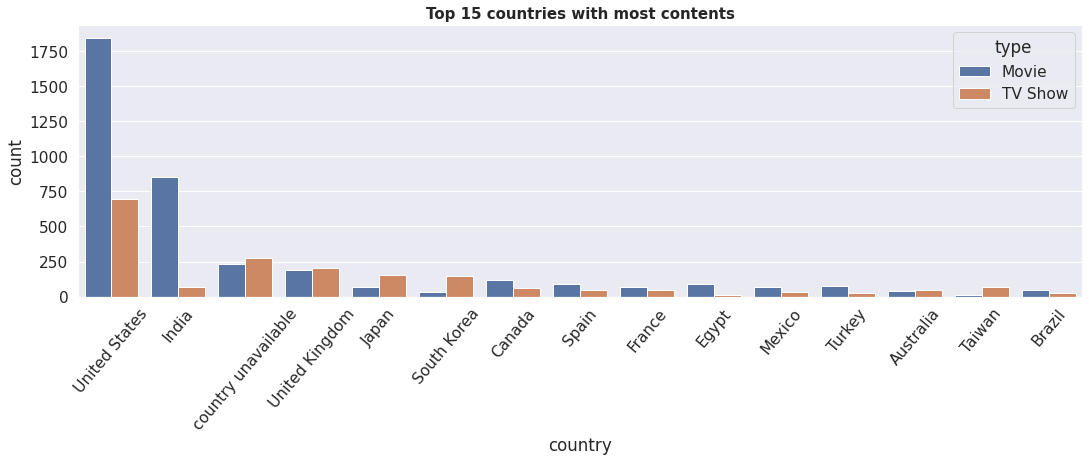

In [ ]:
#Analysing top 15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

**United states has the highest number of content on the netflix, followed by India.**

## 7. Title

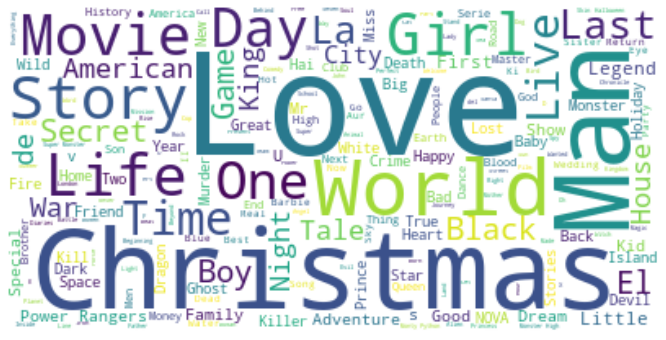

In [ ]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(18,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.**

**I have suprised to see "Christmas" ocuured so many time . The reason maybe those movies released on the month of december.**

## 7.1  Description:

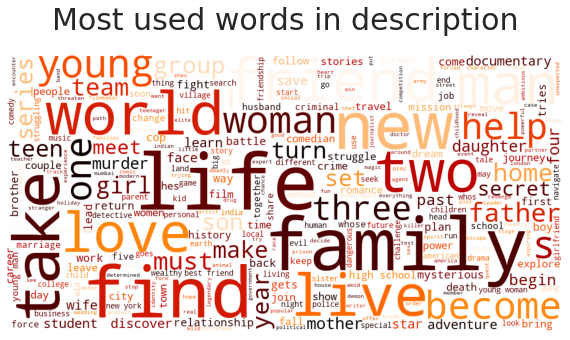

In [ ]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Most occurring words in the description of the tv shows and movies are Family, Friend, Love, Life, Woman, Man.**

##  8. Cast

In [ ]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [ ]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(df)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)  # dropped the nan values in the dataframe which was present at 106th index.

In [ ]:
actor_list.head()

,index,0
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25


In [ ]:
# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**There are 6 of the actors in the top ten list of most numbers tv shows and movies are from India.**

## 9. Heatmap

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:12]
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,Turkey,United Kingdom,United States,country unavailable
target_ages,,,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.01,0.093434,0.073449,0.170297
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.10,0.204545,0.187353,0.235644
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.36,0.189394,0.236842,0.275248
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.53,0.512626,0.502357,0.318812


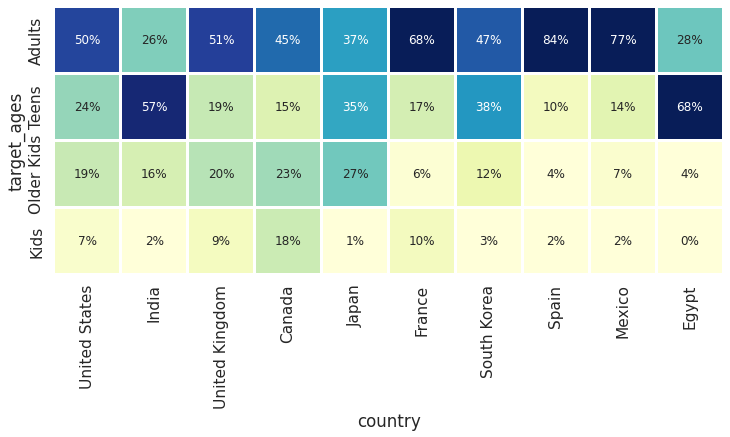

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain','Mexico','Egypt']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()


**US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!**

**Also, Mexico and Spain have similar content on Netflix for different age groups.**

## 10. Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


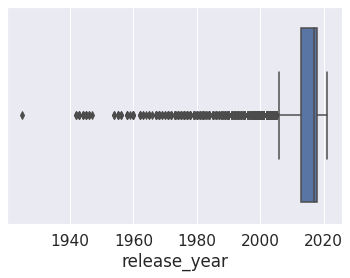

In [ ]:
# Checking outliers on release_year column.
sns.boxplot(df.release_year)

In [ ]:
# Replacing outliers with mean value.
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


**There haven't any release_year which is greater than 2018.**

In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [ ]:
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


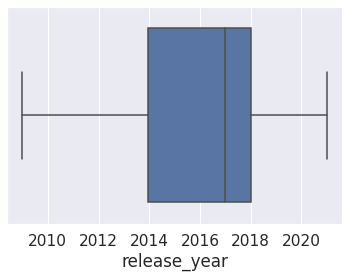

In [ ]:
sns.boxplot(df.release_year)

# Feature engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7770 non-null   object  
 1   type          7770 non-null   category
 2   title         7770 non-null   object  
 3   director      7770 non-null   object  
 4   cast          7770 non-null   object  
 5   country       7770 non-null   object  
 6   date_added    7770 non-null   object  
 7   release_year  7770 non-null   float64 
 8   rating        7770 non-null   object  
 9   duration      7770 non-null   object  
 10  genres        7770 non-null   object  
 11  description   7770 non-null   object  
 12  target_ages   7770 non-null   category
 13  count         7770 non-null   int64   
dtypes: category(2), float64(1), int64(1), object(10)
memory usage: 1.0+ MB


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [ ]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [ ]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [ ]:
df['description'].head()

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
Name: description, dtype: object

In [ ]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [ ]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()

# Clustering algorithms

Five(3) Clustering algo I have used

1. K Mean Clustering.
2. Dendogram
3. AgglomerativeClustering

# 1. K Mean Clustering.

**Elbow Method**

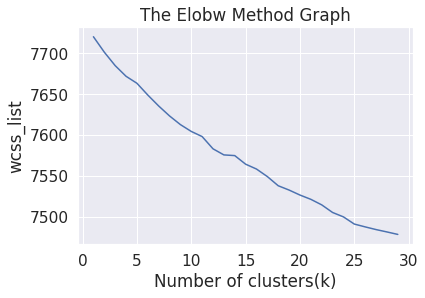

In [ ]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 30.  
for i in range(1, 30):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 30), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

**Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters 
sill = [] 
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0018
cluster: 4 	 Sillhoute: 0.0023
cluster: 5 	 Sillhoute: 0.0025
cluster: 6 	 Sillhoute: 0.0034
cluster: 7 	 Sillhoute: 0.0036
cluster: 8 	 Sillhoute: 0.0040
cluster: 9 	 Sillhoute: 0.0042
cluster: 10 	 Sillhoute: 0.0047
cluster: 11 	 Sillhoute: 0.0047
cluster: 12 	 Sillhoute: 0.0050
cluster: 13 	 Sillhoute: 0.0054
cluster: 14 	 Sillhoute: 0.0058
cluster: 15 	 Sillhoute: 0.0061
cluster: 16 	 Sillhoute: 0.0063
cluster: 17 	 Sillhoute: 0.0064
cluster: 18 	 Sillhoute: 0.0064
cluster: 19 	 Sillhoute: 0.0062
cluster: 20 	 Sillhoute: 0.0067
cluster: 21 	 Sillhoute: 0.0070
cluster: 22 	 Sillhoute: 0.0069
cluster: 23 	 Sillhoute: 0.0070
cluster: 24 	 Sillhoute: 0.0073
cluster: 25 	 Sillhoute: 0.0072
cluster: 26 	 Sillhoute: 0.0075
cluster: 27 	 Sillhoute: 0.0075
cluster: 28 	 Sillhoute: 0.0074
cluster: 29 	 Sillhoute: 0.0076


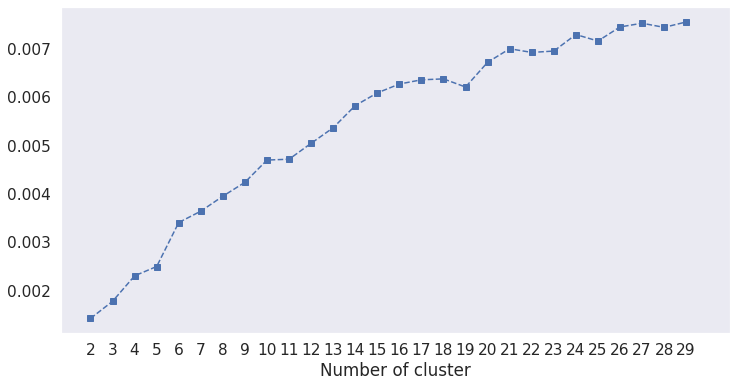

In [ ]:
#Plotting Sillhoute's score
plt.figure(figsize =(12, 6))
plt.plot(sill,'bs--')
plt.xticks(list(range(0,30)),list(range(2,30)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)

In [ ]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007499010681200968


In [ ]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.05605194948868

## 2. Dendogram

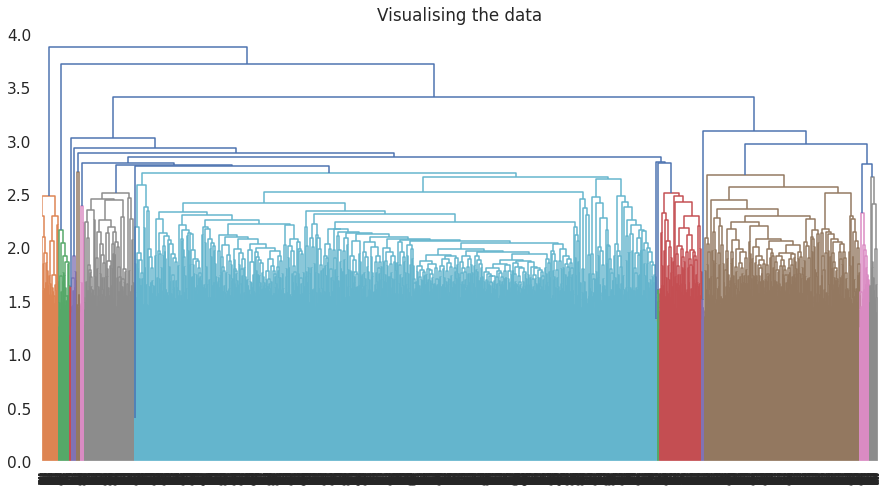

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(15, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

# 3. Agglomerative Clustering

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,target_ages,count,cluster
0,s1,TV Show,3%,no director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.000000,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,Adults,1,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.000000,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,Adults,1,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.000000,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,Adults,1,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.000000,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,Teens,1,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2013.935393,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,Teens,1,0


In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.002


In [ ]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

13.979382092977453

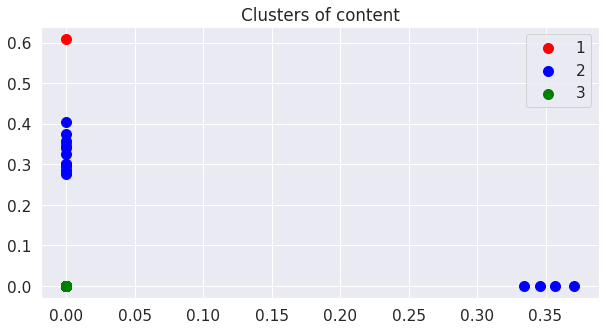

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(10,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

# Conclusion
*  From elbow and sillhoute score ,optimal of 26 clusters formed , K Means is best for identification than Hierarchical as the evaluation metrics also indicates the same. In kmean cluster 0 has the highest number of datapoints
and evnly distributed for other cluster

*  Netflix has 5372 movies and 2398 TV shows,
there are more number movies on Netflix than TV shows.

*  TV-MA has the highest number of ratings for tv shows i,e adult ratings

*  Highest number of movies released in 2017 and 2018

highest number of movies released in 2020 The number of movies on Netflix is growing significantly faster than the number of TV shows. We saw a huge increase in the number of movies and television episodes after 2015. there is a significant drop in the number of movies and television episodes produced after 2020. It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows

*  The most content is added to Netflix from october to january

*  Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies

*  kids tv is the top most TV show genre in netflix

*  most of the movies have duration of between 50 to 150

*  highest number of tv_shows consistig of single season

*  Those movies that have a rating of NC-17 have the longest average duration.

When it comes to movies having a TV-Y rating, they have the shortest runtime on average

*  unitated states has the highest number of content on the netflix ,followed by india

*  india has highest number of movies in netflix

*  30% movies released on Netflix.

*  70% movies added on Netflix were released earlier by different mode.

##  SUMMARY: NETFLIX MOVIES AND TV SHOWS CLUSTERING

The Mobile Price Range analysis is done by group of 3 members-M.Sameer Ahamed, Ayush Goyal, Nitesh Bhowmick. In this project we got NETFLIX MOVIES AND TV SHOWS CLUSTERING as a CSV file.

As we downloaded the data as CSV file from Almabetter Capstone project dasboard we encoded the file in colab notebook trough mounting the drive. All members from the group participated throughout the project with great efforts.

The cleaning of data was done and created the new cleaned dataframe consists of columns which were required for analysis.Each and every column were compared to gain the knowledge for analysis. Worked individually gaing some insights doing some EDA.The first difficulty was the missing data in the dataset & one Column Name, so we renamed the columns by using dictionary format. In the dataset tehre are # columns which contain more NaN Values, so i filled up with requird values & another there are another 2 columns which contains less NaN Values, so, i remove those particular rows which contain NaN values .  From graphs we cleared the Type of shows, ratings, Production Growth based on type of the content & release_year, Genre, Duration, Country, Title & Cast.

After that I created model with 2 different Clustering Algorithims & we conclude that K Means is best for identification than Hierarchical as the evaluation metrics also indicates the same.
